# Tutorial 6 - Sieci neuronowe

## 1) Sieci MLP - multi-layer perceptron
### 1.1) Zasada działania

MLP (perceptron wielowarstwowy) jest algorytmem _uczenia nadzorowanego_. Dla danego zbioru wektorów cech X oraz wektora odpowiedzi y trenuje on _nieliniową_ fukcję $f: R^m \rightarrow R^o$, gdzie $m$ jest liczbą wymiarów wektorów wejściowych a $o$ liczbą wymiarów wektorów wyjściowych. Może być ona używana zarówno do rozwiązywania problemów klasyfikacji, jak i regresji.

Trenowana funkcja $f$ ma postać kilkuwarstwowej sieci. Każda warstwa złożona jest z pewnej ilości neuronów. Pierwsza warstwa jest _warstwą wejściową_, złożoną z $m$ neuronów. Kolejne warstwy złożone są z pewnej ilości neuronów, których wartości zależą od wartości w poprzedniej warstwie. Ostatnia warstwa - _warstwa wyjściowa_ - składa się z $o$ neuronów. Warstwy pomiędzy warstwą wejściową i wyjściową nazywamy _warstwami ukrytymi_. Wartość funkcji $f$ dla wektora $x \in R^m$ jest wartość neuronów wyjściowych dla wartości neuronów wejściowych równej $x$.

Wartość neuronu w warstwie wejściowej zależy od danych wejściowych. Wartość neuronu w warstwach ukrytych i warstwie wyjściowej zależy od sumy ważonej (kombinacji liniowej) wartości neuronów i dodatkowej wartości - bias'u. Dodatkowo, najlepiej aby wartość neuronu $\in [0, 1]$. W tym celu:
* dla _warstwy wejściowej_ - normalizujemy dane
* dla _warstw ukrytych_ i _warstwy wyjściowej_ - obliczoną sumę przepuszczamy przez __funkcję aktywacji__, której dziedziną jest $R$ a zbiorem wartości jest $[0, 1]$ . Przykładową funkcją aktywacji jest sigmoid: $f(x) = (1 + e^{-x})^{-1}$. Wykresy funkcji aktywacji znajdują się poniżej:

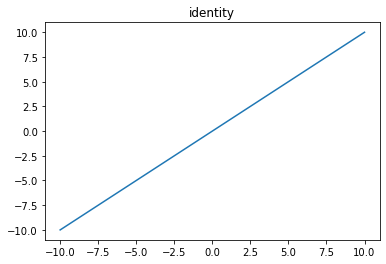

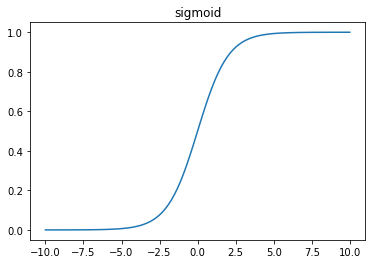

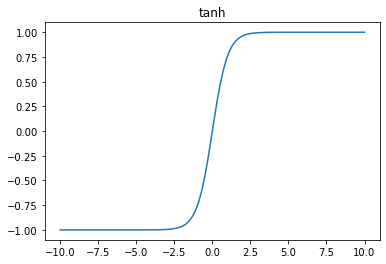

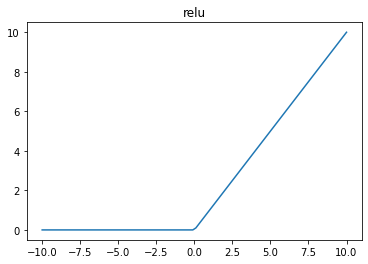

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

def plot(f, title):
    x = np.linspace(-10, 10, 100)
    y = [f(i) for i in x]
    plt.plot(x, y)
    plt.title(title)
    plt.show()
    
plot(lambda x: x, 'identity')
plot(lambda x: 1 / (1 + math.exp(-x)), 'sigmoid')
plot(lambda x: math.tanh(x), 'tanh')
plot(lambda x: max(0, x), 'relu')


Wykresy funkcji aktywacji

Możemy zauważyć, że obliczenie wartości neuronów dla warstwy składa się z dwóch kroków:
1. _przekształcenie affiniczne_ wektora wartości neuronów z poprzedniej warstwy. Przekształcenie affiniczne jest to przekształcenie w postaci $x \rightarrow f(x) + b$, gdzie f jest przekształceniem liniowym a b wektorem przesunięcia.
2. obliczenie wartości poszczególnych neuronów na podstawie wartości wektora uzyskanych w punkcie (1) z użyciem funkcji aktywacji

Przekształcenie affiniczne wektora $X$ w $X'$ możemy zamienić w przekształcenie liniowe, dodając do wektora X dodatkową współrzędną o wartości 1. Umożliwia to dodanie stałego współczynnika do kombinacji liniowych - mnożąc wagę razy 1 otrzymamy zawsze daną wagę (patrz rysunek 1). Dzięki temu, możemy przedstawić współczynniki w postaci macierzy przekształcenia liniowego, a samo przekształcenie zrealizować jako mnożenie macierzy przez wektor.

### 1.2) Trenowanie sieci
Parametrami funkcji f, które trenujemy, są:
* wagi średniej ważonej (`coefs_`) - dla każdego neuronu w warstwie $l$ wag jest tyle, ile neuronów w warstwie $l - 1$,
* bias'y (`intercepts_`) - po jednym dla każdego neuronu.

Jeśli ilość neuronów w warstwie l oznaczymy jako $n_l$, dla każdej warstwy mamy $(n_{l - 1} + 1) n_l$ wartości do wyznaczenia. Jeśli mamy L warstw w naszej sieci MLP, mamy $\sum_{l=2}^{L} ((n_{l - 1} + 1) n_l)$ wartości do wyznaczenia.

Trenowanie sieci neuronowej polega na minimalizacji funkcji strat (loss function) na danym zbiorze treningowym, wyrażającej "koszt" sieci neuronowej. Standardowo używa się sumy błędów średniokwadratowych pomiędzy wynikami sieci neuronowej a wartościami oczekiwanymi dla kolejnych wektorów wejściowych. Parametrami funkcji loss są wszystkie parametry (wagi średnich ważonych oraz bias'y) naszej sieci neuronowej. Ilość tych parametrów jest bardzo duża, dlatego nie stosuje się standardowej metody wyznaczania ekstremów funkcji wielu zmiennych (przyrównywanie pochodnych cząstkowych do zera). Zamiast tego, istnieją specjalne metody:
* `sgd` - schotastic gradient descent
* `adam` - another schotastic gradient descent
* `lbfgs` - another optimizer

Więcej informacji na temat tych metod znajduje się na wykładzie oraz prezentacji do tego tutoriala.

Na kanale 3blue3brown w serwisie YouTube znajduje się 4-odcinkowa seria ilustrująca działanie sieci neuronowej MLP z użyciem schotastic gradient descent na zbiorze MNIST - https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi.

### 1.3) Przykład
Na potrzeby tego tutoriala, wykorzystamy bibliotekę `scikit-learn`. Wykorzystuje ona jedynie CPU, przez co nie nadaje się do zastosowań o dużej skali. Obliczenia związane z sieciami neuronowymi dziś wykorzystuje się zazwyczaj z użyciem GPU lub specjalizowanych układów stworzonych do tego celu (np. opartych na FPGA lub będących częściami nowoczesnych układów SoC w smartfonach). Biblioteki takie jak `tensorflow`, `keras` bądź `pytorch` umożliwiają działania na sieciach neuronowych z wykorzystaniem GPU.

Działanie sieci MLP pokażemy standardowo na zbiorze `MNIST`:

In [34]:
import tensorflow as tf # korzystamy jedynie w celu pobrania zbioru MNIST

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

Biblioteka `scikit-learn` udostępnia klasę `MLPClassifier`, implementującą algorytm MLP używający backpropagation do trenowania.

Konstruktor klasy `MLPClassifier` pozwala na ustawienie wielu parametrów, ich pełna lista dostępna jest w dokumentacji `scikit-learn`. Najważniejsze z nich to:
* __solver__ - metoda użyta do trenowania sieci. Dostępne metody: `"sgd"`\\`"adam"`\\`"lbfgs"`
* __hidden_layer_sizes__ -  lista rozmiarów warstw ukrytych
* __activation__ - użyta funkcja aktywacji. Dostępne funkcje aktywacji:
    * `'identity'` - funkcja tożsamościowa
    * `'logistic'` - sigmoid
    * `'tanh'` - tangens hiperboliczny
    * `'relu'` - $f(x) = max(0, x)$
* __alpha__ - wartość parametru regularyzacji - pozwala na ograniczanie rozmiaru wag. Odpowiednie dobranie tego parametru pozwala na ograniczenie overfittingu/underfittingu.
* __random_state__ - seed funkcji losowej, użytej do generowania wag. Aby wszystkie sieci miały początkowo takie same wagi, wartość parametru random_state musi być jednakowa.
* __max_iter__ - maksymalna ilość iteracji trenowania

In [35]:
SEED = 6

Klasy `MLPClassifier` używamy podobnie, jak innych klasyfikatorów będących częścią biblioteki sklearn.

In [4]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    solver='sgd', 
    hidden_layer_sizes=(50,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=10,
    max_iter=100
)
clf.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 1.37862516
Iteration 3, loss = 1.20039818
Iteration 4, loss = 0.97491142
Iteration 5, loss = 0.80410060
Iteration 6, loss = 0.71582240
Iteration 7, loss = 0.66572200
Iteration 8, loss = 0.63686932
Iteration 9, loss = 0.60689249
Iteration 10, loss = 0.58790811
Iteration 11, loss = 0.57254267
Iteration 12, loss = 0.55623639
Iteration 13, loss = 0.54671985
Iteration 14, loss = 0.53725902
Iteration 15, loss = 0.52709094
Iteration 16, loss = 0.51928503
Iteration 17, loss = 0.51101163
Iteration 18, loss = 0.50452320
Iteration 19, loss = 0.49623327
Iteration 20, loss = 0.49041904
Iteration 21, loss = 0.48722838
Iteration 22, loss = 0.47850012
Iteration 23, loss = 0.47406498
Iteration 24, loss = 0.47003966
Iteration 25, loss = 0.46432487
Iteration 26, loss = 0.46059564
Iteration 27, loss = 0.45723219
Iteration 28, loss = 0.45346127
Iteration 29, loss = 0.45246021
Iteration 30, loss = 0.44632665
Iteration 31, loss = 0.44299785
Iteration 32, loss = 0.4

d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=6, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

Używając zbioru testowego MNIST sprawdźmy, ile wynosi accuracy score naszego modelu.

In [5]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
y_test
accuracy_score(y_test, y_pred)

0.9111

Obiekty klasy `MLPClassifier` udostępniają m. in. następujące atrybuty:
* `loss_` - obecna wartość funkcji loss
* `coefs_` - lista macierzy wag dla poszczególnych warstw
* `intercepts_` - lista wektorów bias dla poszczególnych warstw

In [6]:
clf.loss_

0.2920991397105794

Wyświetlmy wartości współczynników macierzy wag dla niektórych neuronów w warstwie ukrytej w postacji obrazków:

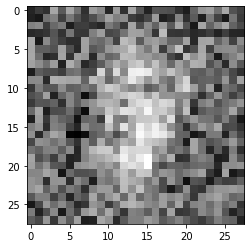

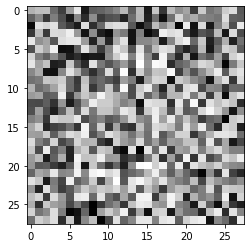

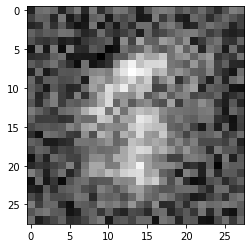

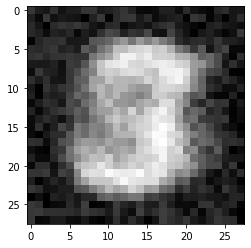

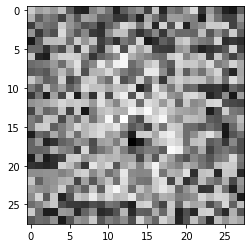

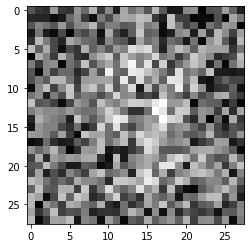

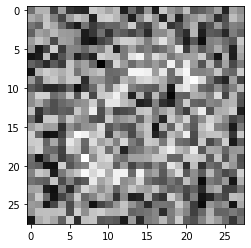

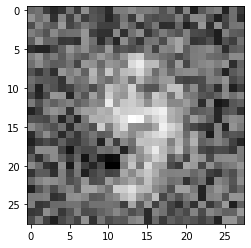

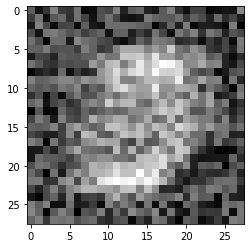

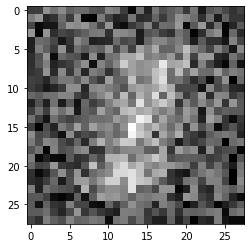

In [7]:
for i in range(10):
    coefs = clf.coefs_[0][:,i]
    coefs = coefs.reshape(28, 28)
    plt.imshow(coefs, cmap='Greys')
    plt.show()

Możemy zauważyć, że dla _większości_ obrazków wagi macierzy aktywacji nie reprezentują konkretnych kształtów.

Wyświetlmy dodatkowo wartości bias dla tych neuronów:

In [8]:
clf.intercepts_[0][:10]

array([ 0.07642884, -0.01604248, -0.06877835, -0.04130371,  0.01280611,
       -0.07110658, -0.03079   , -0.084265  , -0.03832847,  0.0819824 ])

### 1.4) Zadanie

Pokazać jak zmiany parametrów sieci (wielkość sieci dobrać do wielkości danych i możliwości obliczeniowych) tj.
optymalizator, regularyzacja (np., drop-out), funkcja aktywacji i inne wpływa na wynik.
Ważne: __sieć ma być trenowana dla identycznych wag początkowych__ (należy użyć sieci o takim samym rozmiarze i zanicjować sieć z użyciem takiego samego seed'a (parametr `random_state`). 
W sprawozdaniu należy umieścić tabelkę zawierającą rezultaty i wnioski.

| solver | hidden_layers_sizes | activation | alpha | loss    | accuracy_score |
|--------|---------------------|------------|-------|---------|----------------|
|  sgd   |         50          |  logistic  |  1e-5 | 0.11761 |    0.9492      |
|  sgd   |     100,50,25       |  logistic  |  1e-5 | 0.17488 |    0.9385      |
|  sgd   |         50          |  logistic  |  1e-4 | 0.11936 |    0.9493      |
|  sgd   |         50          |  logistic  |  1e-6 | 0.11261 |    0.9496      |
|  sgd   |         50          |  relu      |  1e-5 | 0.29210 |    0.9111      |
|  adam  |         50          |  logistic  |  1e-5 | 0.14834 |    0.9483      |
|  adam  |         70          |  logistic  |  1e-5 | 0.14834 |    0.9579      |
|  adam  |         30          |  logistic  |  1e-5 | 0.18059 |    0.9431      |

In [36]:
# rozwiązanie zadania
clf = MLPClassifier(
    solver='sgd',
    activation='logistic',
    hidden_layer_sizes=(50,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=False,
    max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (50,) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\tloss: "+str(accuracy_score(y_test, y_pred)))

sgd (50,) logistic 1e-5
	loss: 0.11761367647741466
	loss: 0.9492


d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
clf = MLPClassifier(
    solver='sgd',
    activation='logistic',
    hidden_layer_sizes=(100, 50, 25,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=False,
    max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (100, 50, 25,) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\tloss: "+str(accuracy_score(y_test, y_pred)))

d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


sgd (100, 50, 25,) logistic 1e-5
	loss: 0.17488497192768593
	loss: 0.9385


In [42]:
clf = MLPClassifier(
    solver='sgd',
    activation='logistic',
    hidden_layer_sizes=(50), 
    random_state=SEED, 
    alpha=1e-4, 
    verbose=False,
    max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (50,) logistic 1e-4")
print("\tloss: "+str(clf.loss_))
print("\tloss: "+str(accuracy_score(y_test, y_pred)))

d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


sgd (50,) logistic 1e-4
	loss: 0.119355694515704
	loss: 0.9493


In [43]:
clf = MLPClassifier(
    solver='sgd',
    activation='logistic',
    hidden_layer_sizes=(50,), 
    random_state=SEED, 
    alpha=1e-6, 
    verbose=False,
    max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (50,) logistic 1e-6")
print("\tloss: "+str(clf.loss_))
print("\tloss: "+str(accuracy_score(y_test, y_pred)))

d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


sgd (50,) logistic 1e-6
	loss: 0.11260904167509843
	loss: 0.9496


In [44]:
clf = MLPClassifier(
    solver='sgd',
    activation='relu',
    hidden_layer_sizes=(50,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=False,
    max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (50,) relu 1e-5")
print("\tloss: "+str(clf.loss_))
print("\tloss: "+str(accuracy_score(y_test, y_pred)))

sgd (50,) logistic 1e-5
	loss: 0.2920991397105794
	loss: 0.9111


d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
clf = MLPClassifier(
    solver='adam',
    activation='logistic',
    hidden_layer_sizes=(50,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=False,
    max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("adam (50,) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\tloss: "+str(accuracy_score(y_test, y_pred)))

adam (50,) logistic 1e-5
	loss: 0.14833937476985085
	loss: 0.9483


In [46]:
clf = MLPClassifier(
    solver='adam',
    activation='logistic',
    hidden_layer_sizes=(70,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=False,
    max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("adam (70,) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\tloss: "+str(accuracy_score(y_test, y_pred)))

d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


adam (70,) logistic 1e-5
	loss: 0.12727391034259206
	loss: 0.9579


In [49]:
clf = MLPClassifier(
    solver='adam',
    activation='logistic',
    hidden_layer_sizes=(30,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=False,
    max_iter=100
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("adam (30,) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\tloss: "+str(accuracy_score(y_test, y_pred)))

adam (30,) logistic 1e-5
	loss: 0.18059471683680633
	loss: 0.9431


d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# 2) Wpływ długości uczenia sieci na błąd

Zmierzmy dokładność naszej sieci w zależności od długości uczenia. W przypadku stochastycznych solverów (sgd, adam) parametr max_iter oznacza liczbę epok. Jeżeli chcemy użyć innego solvera musimy wyznaczyć odpowiednie batch_size oraz max_iter. Czym jest batch size oraz iteracja w ogólności: https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

In [10]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [11]:
from sklearn.utils import resample

X_train, y_train = resample(X_train, y_train, random_state=0, n_samples=200)

In [12]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

start_iter = 10 # startowa ilość iteracji
max_iters = 301  # maksymalna ilość iteracji
step_size = 10   

scores = pd.DataFrame(columns=['n_iters', 'test_score', 'loss'])

for max_iter in range(start_iter, max_iters + 1, step_size):
    clf = MLPClassifier(activation='relu', 
                        hidden_layer_sizes=(512, 256, 128,), # ity element odpowiada wielkości itej warstwy
                        solver='sgd',
                        random_state=0, 
                        max_iter=max_iter, # w przypadku solvera innego niż sgd lub adam trzeba odpowiednio przeliczyć ilość iteracji oraz dodać parametr batch_size
                        learning_rate='adaptive',
                        alpha=1e-4
                       )
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)

    row = {
        'n_iters': clf.n_iter_,
        'max_iter': max_iter,
        'train_score': accuracy_score(y_train, y_train_pred),
        'test_score': accuracy_score(y_test, y_pred),
        'loss': clf.loss_
    }
    scores = scores.append(row, ignore_index=True)
                    
scores
                        

d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Ma

,n_iters,test_score,loss,max_iter,train_score
0,10.0,0.1045,34.897361,10.0,0.145
1,20.0,0.5005,1.019064,20.0,0.740
2,30.0,0.6191,0.198626,30.0,0.965
3,40.0,0.6494,0.071623,40.0,0.990
4,50.0,0.6608,0.035965,50.0,0.995
5,60.0,0.6677,0.021763,60.0,0.995
6,70.0,0.6695,0.014912,70.0,1.000
7,80.0,0.6701,0.011097,80.0,1.000
8,90.0,0.6707,0.008727,90.0,1.000
9,100.0,0.6728,0.007231,100.0,1.000


Najpierw sprawdźmy jak wygląda ```Accuracy Score``` na zbiorze testowym

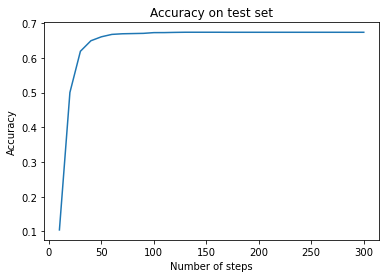

In [13]:
import matplotlib.pyplot as plt

plt.xlabel("Number of steps")
plt.ylabel("Accuracy")
plt.title("Accuracy on test set")
plt.plot(scores['max_iter'], scores['test_score'])
plt.show()

Po ~70 krokach ```Accuracy Score``` przestaje rosnąć. Sprawdźmy zatem jak wygląda ```Accuracy Score``` na zbiorze trzeningowym.

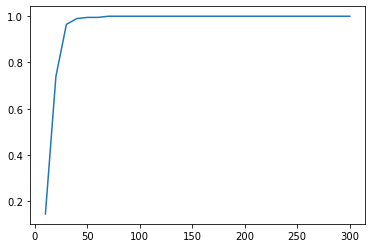

In [14]:
plt.plot(scores['max_iter'], scores['train_score'])

W przypadku zbioru testowego model osiąga prawie 100% skuteczność na samym sobie po ~40 krokach. Po 70 krokach model zna siebie na pamięć przez co nie może się niczego więcej nauczyć. Następuje underfitting- potrzebujemy zwiększyć zbiór treningowy, żeby osiągnął lepsze wyniki.

# 3) Sieci konwolucyjne - Convolutional Neural Network

Sieci konwolucyjne to podklasa sieci neuronowych. Z natury świetnie nadają się do klasyfikacji obrazów oraz wyszukiawania wzroca w obrazie. Ich budowę można podzielić na dwie głównie warstwy:
- warstwa konwolucji
- warstwa sieci neuronowej


Warstwa sieci neuronowej to Fully Connected Network, czyli poznana wcześniej sieć MLP.  
Warstwa konwolucji składa się z 3 etapów:
1. Konwolucji właściwej
2. Operacji ReLU (Rectified Linear Unit)
3. Poolingu


Warstwa konwolucji może być powtórzona wielokrotnie.
Większość frameworków posiada gotowe narzędzia do budowy sieci konwolucyjnych. Poniżej spróbujemy zbudować warstwę konwolucji od zera, aby zobaczyć na czym to polega.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-4-59-29-pm.png?w=748)

### 3.1) Konwolucja

Operacja konwolucji jest operacją filtrowania (splotu). Operacja ta przyjmuje na wejściu dwie macierze:

- Macierz $I_{MxN}$ reprezentującą obraz. Dla uproszczenia rozważamy jedynie obrazy w 256 odcieniach szarości. Każdy element macierzy $I$ jest więc liczbą całkowitą z zakresu 0 do 255.
- Macierz $K_{c×c}$, gdzie $c < M$ oraz $c < N$ reprezentującą filtr. Elementami tej macierzy są liczby zmiennoprzecinkowe (często ujemne).

Operacja filtrowania tworzy nowy obraz $J$, którego piksele mają wartość:

$J[x,y]=s_{x, y}$


$s_{x,y}=\sum_{i=1}^{c} \sum_{j=1}^{c}I[x + i - ceil(c/2), y + j - ceil(c/2)]∗k[i,j]$

Powstawły obraz będzie odpowiednio mniejszy, zależnie od wielkości $c$. Indeksowanie w powyższych wzorach zaczyna się od 1.

Konwolucja jest operacją liniową wykonywaną na macierzy, polegającą na aplikacji pewnego filtru, zwanego kernelem. 
![](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196)

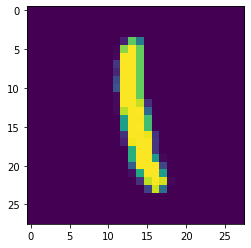

In [15]:
img = X_train[3].reshape(28, 28)
plt.imshow(img)

Zadeklarujmy filtry pierwszej wartswy konwolucyjnej.

In [16]:
l1_filter = np.zeros((2,3,3))
l1_filter[0, :, :] = np.array([[[-1, 0, 1],   
                                   [-1, 0, 1],   
                                   [-1, 0, 1]]])  
l1_filter[1, :, :] = np.array([[[1,   1,  1],   
                                   [0,   0,  0],   
                                   [-1, -1, -1]]])

In [17]:
def conv(img, conv_filter):
    if len(img.shape) != len(conv_filter.shape) - 1: # Check whether number of dimensions is the same
        print("Error: Number of dimensions in conv filter and image do not match.")  
        return 
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: Number of channels in both image and filter must match.")
            return
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')
        return
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')
        return

    # An empty feature map to hold the output of convolving the filter(s) with the image.
    feature_maps = np.zeros((img.shape[0]-conv_filter.shape[1]+1, 
                                img.shape[1]-conv_filter.shape[1]+1, 
                                conv_filter.shape[0]))

    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.
        """ 
        Checking if there are mutliple channels for the single filter.
        If so, then each channel will convolve the image.
        The result of all convolutions are summed to return a single feature map.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.
                conv_map = conv_map + conv_(img[:, :, ch_num], 
                                  curr_filter[:, :, ch_num])
        else: # There is just a single channel in the filter.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.

def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = np.zeros((img.shape))
    #Looping through the image to apply the convolution operation.
    for r in np.uint16(np.arange(filter_size/2.0, 
                          img.shape[0]-filter_size/2.0+1)):
        for c in np.uint16(np.arange(filter_size/2.0, 
                                           img.shape[1]-filter_size/2.0+1)):
            curr_region = img[r-np.uint16(np.floor(filter_size/2.0)):r+np.uint16(np.ceil(filter_size/2.0)), 
                              c-np.uint16(np.floor(filter_size/2.0)):c+np.uint16(np.ceil(filter_size/2.0))]
            #Element-wise multipliplication between the current region and the filter.
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result) #Summing the result of multiplication.
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.
            
    #Clipping the outliers of the result matrix.
    final_result = result[np.uint16(filter_size/2.0):result.shape[0]-np.uint16(filter_size/2.0), 
                          np.uint16(filter_size/2.0):result.shape[1]-np.uint16(filter_size/2.0)]
    return final_result

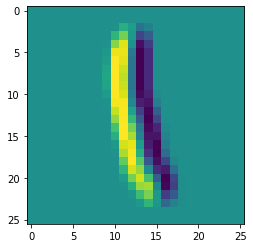

In [18]:
l1_feature_map = conv(img, l1_filter)
plt.imshow(l1_feature_map[:, :, 0])

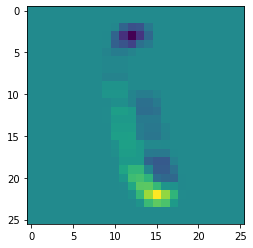

In [19]:
plt.imshow(l1_feature_map[:, :, 1])

### 3.2 ReLU

Operacja konwolucji jest liniowa (mnożenie macierzy oraz sumwanie), co niekonieczenie jest przez nas porządane przy uczeniu sieci neuronowej, gdzie dane wejściowe nie są liniowe. Z pomocą przchodzi prosta funkcja ReLU opisana wzorem $Output = max(0, Input)$, gdzie $Input$ to wartość piksela wynikowej macierzy po zaaplikowaniu filtrów
![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-2-23-48-am.png?w=537&h=168)

In [20]:
def relu(feature_map):  
    relu_out = np.zeros(feature_map.shape)  
    for map_num in range(feature_map.shape[-1]):  
        for r in np.arange(0,feature_map.shape[0]):  
            for c in np.arange(0, feature_map.shape[1]):  
                relu_out[r, c, map_num] = np.max([feature_map[r, c, map_num], 0])
    return relu_out

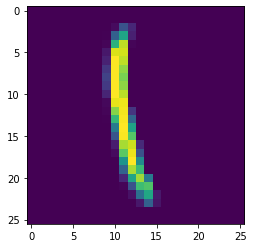

In [21]:
l1_feature_map_relu = relu(l1_feature_map)
plt.imshow(l1_feature_map_relu[:, :, 0])

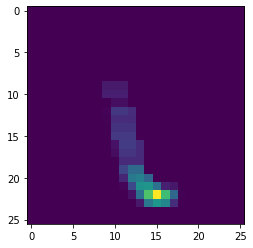

In [22]:
plt.imshow(l1_feature_map_relu[:, :, 1])

Inną funkcją do konwersji danych w nieliniowe, jest poznana wcześniej funkcja sigmoid, jednak ReLU uznawane jest za najlepszą ze względu na wyniki poparte badaniami.

### 3.3 Pooling

Pooling zwany również subsampling lub downsampling jest operacją zmniejszającą ilość rozmiar otrzymanej feature mapy. Rozpatruje się 3 głównie metody pooling:
- Max
- Average
- Sum

Metod tych może być oczywiście więcej.

Operacja jest dosyć intuicyjna. Dzielimy Macierz na podmacierze, na których aplikujemy funkcję poolingu, która zwróci nam w zależności od wybranej metody skalar. W ten sposób uzyskamy mniejszą macież.
![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=494)

In [23]:
def pooling(feature_map, size=2, stride=2):
    #Preparing the output of the pooling operation.
    pool_out = np.zeros((np.uint16((feature_map.shape[0]-size+1)/stride+1),
                            np.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in np.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in np.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = np.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out

(13, 13, 2)

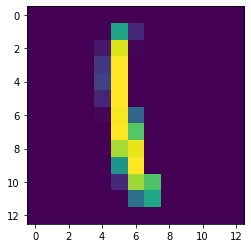

In [24]:
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
plt.imshow(l1_feature_map_relu_pool[:, :, 0])
l1_feature_map_relu_pool.shape

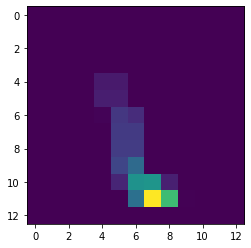

In [25]:
plt.imshow(l1_feature_map_relu_pool[:, :, 1])

Na koniec możemy dodać kolejne warstwy konwolucyjne. Z powodu niwielkich rozmiarów obrazka ograniczymy się do dwóch warstw

In [26]:
l1_feature_map_relu_pool.shape

(13, 13, 2)

In [27]:
l2_filter = np.random.rand(16, 3, 3, l1_feature_map_relu_pool.shape[-1])
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
l2_feature_map_relu = relu(l2_feature_map)
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)

(6, 6, 16)

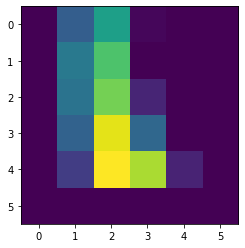

In [28]:
plt.imshow(l2_feature_map_relu_pool[:, :, 0])
l2_feature_map_relu_pool.shape

### 3.4 CNN w Tensorflow

Powyższe kroki wykorzystamy do stworzenia sieci CNN

In [29]:
from tensorflow.keras import models, layers, utils

model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Trzecia warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [51]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.6542 - accuracy: 0.7975 - val_loss: 0.1631 - val_accuracy: 0.9499
Epoch 2/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1352 - accuracy: 0.9579 - val_loss: 0.0968 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0967 - accuracy: 0.9698 - val_loss: 0.0678 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0783 - accuracy: 0.9763 - val_loss: 0.0654 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.0648 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0480 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.046

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0378292053937912
Test accuracy: 0.9868000149726868


### 3.5 Zadanie dla studentów

Pokazać jak zmiany parametrów sieci (wielkość sieci dobrać do wielkości danych i możliwości obliczeniowych) tj.
ilość wartsw konwolucyjnych, wielkości kerneli, metoda poolingu.
Ważne: __sieć ma być trenowana dla identycznych wag początkowych__ (należy użyć sieci o takim samym rozmiarze i zanicjować sieć z użyciem takiego samego seed'a (parametr `random_state`). 
W sprawozdaniu należy umieścić tabelkę zawierającą rezultaty i wnioski.

| kernel_sizes | activation |layers_number| pooling | loss    | accuracy_score |
|--------------|------------|--------------|---------|---------|----------------|
|     (3,3)    |    relu    |     3        |   MAX   | 0.03783 |     0.9868     |
|     (4,4)    |    relu    |     3        |   MAX   | 0.03989 |     0.9883     |
|     (2,2)    |    relu    |     3        |   MAX   | 0.05090 |     0.9841     |
|     (3,3)    |    relu    |     4        |   MAX   | 0.04737 |     0.9838     |
|     (3,3)    |    relu    |     4        |   AVG   | 0.06119 |     0.9801     |

In [52]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Trzecia warstwa konwolucyjna
model.add(layers.Conv2D(64, (4, 4), activation='relu'))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("(4,4), 3 layers, MaxPooling")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.6980 - accuracy: 0.7930 - val_loss: 0.1640 - val_accuracy: 0.9510
Epoch 2/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1415 - accuracy: 0.9571 - val_loss: 0.0917 - val_accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0970 - accuracy: 0.9699 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0775 - accuracy: 0.9758 - val_loss: 0.0637 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0650 - accuracy: 0.9797 - val_loss: 0.0547 - val_accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0

In [53]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Trzecia warstwa konwolucyjna
model.add(layers.Conv2D(64, (2, 2), activation='relu'))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("(2,2), 3 layers, MaxPooling")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.6524 - accuracy: 0.7939 - val_loss: 0.2439 - val_accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1806 - accuracy: 0.9443 - val_loss: 0.1356 - val_accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1145 - accuracy: 0.9657 - val_loss: 0.0989 - val_accuracy: 0.9710
Epoch 4/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0881 - accuracy: 0.9727 - val_loss: 0.0700 - val_accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0737 - accuracy: 0.9768 - val_loss: 0.0667 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0621 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0575 -

In [54]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Trzecia
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Czwarta warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("(3,3), 4 layers, MaxPooling")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.8151 - accuracy: 0.7518 - val_loss: 0.2081 - val_accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.1568 - accuracy: 0.9510 - val_loss: 0.0885 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0970 - accuracy: 0.9706 - val_loss: 0.0661 - val_accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0753 - accuracy: 0.9764 - val_loss: 0.1101 - val_accuracy: 0.9645
Epoch 5/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0630 - accuracy: 0.9809 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0503 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0484 - accuracy: 0.9844 - val_loss: 0

In [55]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))

# Trzecia
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Czwarta warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("(3,3), 4 layers, AveragePooling")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.9167 - accuracy: 0.7315 - val_loss: 0.2980 - val_accuracy: 0.9059
Epoch 2/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2348 - accuracy: 0.9282 - val_loss: 0.1676 - val_accuracy: 0.9476
Epoch 3/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1650 - accuracy: 0.9499 - val_loss: 0.1518 - val_accuracy: 0.9531
Epoch 4/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.1283 - accuracy: 0.9613 - val_loss: 0.1066 - val_accuracy: 0.9655
Epoch 5/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1070 - accuracy: 0.9671 - val_loss: 0.0956 - val_accuracy: 0.9701
Epoch 6/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0920 - accuracy: 0.9722 - val_loss: 0.0891 - val_accuracy: 0.9712
Epoch 7/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.0

# 4. Zadanie dla studentów

Wnioski z porównania sieci MLP i CNN.
Która otrzymuje lepsze wyniki i dlaczego.

# 5. Zadanie dla studentów

Na zbiorze FMNIST i 20NG (TNG) (można dokonać zmniejszenia ilości wymiarów używając
PCA) porównać performance sieci MLP i CNN w funkcji ilości warstw. Zaczynamy od
jednowarstwowej sieci MLP i minimalnej sieci CNN o porównywalnych ilościach wag.
Następnie zwiększamy liczbę warstw zakładając, że ilość wag jest podobna jak dla
początkowej konfiguracji. WNIOSKI.
Wyniki dokładności porównać do najlepszego modelu klasycznego.

In [1]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [3]:
from sklearn.metrics import accuracy_score
SEED = 6

In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    solver='sgd', 
    hidden_layer_sizes=(100,), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=True,
    max_iter=100,
    activation="logistic"
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (100,) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\ta_s: "+str(accuracy_score(y_test, y_pred)))

Iteration 1, loss = 1.24192261
Iteration 2, loss = 0.78664179
Iteration 3, loss = 0.65829681
Iteration 4, loss = 0.59169650
Iteration 5, loss = 0.55659646
Iteration 6, loss = 0.53137346
Iteration 7, loss = 0.51348123
Iteration 8, loss = 0.49729234
Iteration 9, loss = 0.48470402
Iteration 10, loss = 0.47083549
Iteration 11, loss = 0.46815161
Iteration 12, loss = 0.46447543
Iteration 13, loss = 0.45860657
Iteration 14, loss = 0.45542571
Iteration 15, loss = 0.45120600
Iteration 16, loss = 0.45068617
Iteration 17, loss = 0.44499655
Iteration 18, loss = 0.44432597
Iteration 19, loss = 0.43866778
Iteration 20, loss = 0.43094881
Iteration 21, loss = 0.43361356
Iteration 22, loss = 0.43432254
Iteration 23, loss = 0.42318116
Iteration 24, loss = 0.42870107
Iteration 25, loss = 0.42551789
Iteration 26, loss = 0.42418002
Iteration 27, loss = 0.42239099
Iteration 28, loss = 0.41914401
Iteration 29, loss = 0.41617623
Iteration 30, loss = 0.41346743
Iteration 31, loss = 0.41449205
Iteration 32, los

In [5]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    solver='sgd', 
    hidden_layer_sizes=(100,75), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=True,
    max_iter=100,
    activation="logistic"
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (100, 75) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\ta_s: "+str(accuracy_score(y_test, y_pred)))

Iteration 1, loss = 2.19803287
Iteration 2, loss = 1.97914077
Iteration 3, loss = 1.72007378
Iteration 4, loss = 1.48671911
Iteration 5, loss = 1.30626809
Iteration 6, loss = 1.16860182
Iteration 7, loss = 1.06122792
Iteration 8, loss = 0.97402293
Iteration 9, loss = 0.90403693
Iteration 10, loss = 0.84549513
Iteration 11, loss = 0.79596991
Iteration 12, loss = 0.75301637
Iteration 13, loss = 0.71649900
Iteration 14, loss = 0.68460638
Iteration 15, loss = 0.65446262
Iteration 16, loss = 0.62919598
Iteration 17, loss = 0.60687030
Iteration 18, loss = 0.58547028
Iteration 19, loss = 0.57189254
Iteration 20, loss = 0.55418811
Iteration 21, loss = 0.53965755
Iteration 22, loss = 0.52587491
Iteration 23, loss = 0.51709395
Iteration 24, loss = 0.50554771
Iteration 25, loss = 0.50019798
Iteration 26, loss = 0.49043159
Iteration 27, loss = 0.47982790
Iteration 28, loss = 0.47545705
Iteration 29, loss = 0.46676501
Iteration 30, loss = 0.46525359
Iteration 31, loss = 0.46597440
Iteration 32, los

In [6]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    solver='sgd', 
    hidden_layer_sizes=(100, 75, 60), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=True,
    max_iter=150,
    activation="logistic"
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (100, 75, 60) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\ta_s: "+str(accuracy_score(y_test, y_pred)))

Iteration 1, loss = 2.30909336
Iteration 2, loss = 2.29440148
Iteration 3, loss = 2.28879932
Iteration 4, loss = 2.28253751
Iteration 5, loss = 2.27473407
Iteration 6, loss = 2.26452051
Iteration 7, loss = 2.24928081
Iteration 8, loss = 2.22520988
Iteration 9, loss = 2.18608557
Iteration 10, loss = 2.12047994
Iteration 11, loss = 2.02041120
Iteration 12, loss = 1.90164530
Iteration 13, loss = 1.79786082
Iteration 14, loss = 1.72288506
Iteration 15, loss = 1.66759508
Iteration 16, loss = 1.62041868
Iteration 17, loss = 1.57464005
Iteration 18, loss = 1.52903066
Iteration 19, loss = 1.48388249
Iteration 20, loss = 1.43918943
Iteration 21, loss = 1.39569459
Iteration 22, loss = 1.35371909
Iteration 23, loss = 1.31311536
Iteration 24, loss = 1.27458628
Iteration 25, loss = 1.23642544
Iteration 26, loss = 1.19921414
Iteration 27, loss = 1.16392025
Iteration 28, loss = 1.13072367
Iteration 29, loss = 1.09940763
Iteration 30, loss = 1.07176805
Iteration 31, loss = 1.04469816
Iteration 32, los

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(
    solver='sgd', 
    hidden_layer_sizes=(100, 75, 60, 60), 
    random_state=SEED, 
    alpha=1e-5, 
    verbose=True,
    max_iter=300,
    activation="logistic"
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("sgd (100, 75, 60, 60) logistic 1e-5")
print("\tloss: "+str(clf.loss_))
print("\ta_s: "+str(accuracy_score(y_test, y_pred)))

Iteration 1, loss = 2.30695916
Iteration 2, loss = 2.30244801
Iteration 3, loss = 2.30229333
Iteration 4, loss = 2.30208530
Iteration 5, loss = 2.30186088
Iteration 6, loss = 2.30166040
Iteration 7, loss = 2.30152162
Iteration 8, loss = 2.30123824
Iteration 9, loss = 2.30103931
Iteration 10, loss = 2.30087212
Iteration 11, loss = 2.30057499
Iteration 12, loss = 2.30038188
Iteration 13, loss = 2.30006951
Iteration 14, loss = 2.29989318
Iteration 15, loss = 2.29961395
Iteration 16, loss = 2.29922300
Iteration 17, loss = 2.29892173
Iteration 18, loss = 2.29855793
Iteration 19, loss = 2.29809643
Iteration 20, loss = 2.29757194
Iteration 21, loss = 2.29694068
Iteration 22, loss = 2.29628252
Iteration 23, loss = 2.29543241
Iteration 24, loss = 2.29448254
Iteration 25, loss = 2.29323041
Iteration 26, loss = 2.29176276
Iteration 27, loss = 2.28995195
Iteration 28, loss = 2.28768349
Iteration 29, loss = 2.28468552
Iteration 30, loss = 2.28075128
Iteration 31, loss = 2.27523877
Iteration 32, los

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
from tensorflow.keras import models, layers, utils

In [11]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("(3,3), 1 layer, MaxPooling")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.7195 - accuracy: 0.7501 - val_loss: 0.5538 - val_accuracy: 0.7952
Epoch 2/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.4890 - accuracy: 0.8247 - val_loss: 0.4910 - val_accuracy: 0.8223
Epoch 3/10
1875/1875 [==============================] - 138s 73ms/step - loss: 0.4321 - accuracy: 0.8465 - val_loss: 0.4753 - val_accuracy: 0.8186
Epoch 4/10
1875/1875 [==============================] - 137s 73ms/step - loss: 0.3945 - accuracy: 0.8607 - val_loss: 0.3981 - val_accuracy: 0.8613
Epoch 5/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.3660 - accuracy: 0.8699 - val_loss: 0.3817 - val_accuracy: 0.8629
Epoch 6/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.3460 - accuracy: 0.8775 - val_loss: 0.3727 - val_accuracy: 0.8650
Epoch 7/10
1875/1875 [==============================] - 140s 75ms/step - loss: 0.3299 - accuracy: 0.8828 - val_loss: 0

In [12]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("(3,3), 2 layers, MaxPooling")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.8843 - accuracy: 0.6818 - val_loss: 0.6227 - val_accuracy: 0.7626
Epoch 2/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.5404 - accuracy: 0.8002 - val_loss: 0.5077 - val_accuracy: 0.8121
Epoch 3/10
1875/1875 [==============================] - 139s 74ms/step - loss: 0.4641 - accuracy: 0.8308 - val_loss: 0.4549 - val_accuracy: 0.8344
Epoch 4/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.4219 - accuracy: 0.8473 - val_loss: 0.4195 - val_accuracy: 0.8488
Epoch 5/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.3941 - accuracy: 0.8566 - val_loss: 0.4370 - val_accuracy: 0.8328
Epoch 6/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.3741 - accuracy: 0.8663 - val_loss: 0.3814 - val_accuracy: 0.8614
Epoch 7/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.3582 - accuracy: 0.8706 - val_loss: 0

In [13]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Trzecia warstwa konwolucyjna
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("(3,3), 3 layers, MaxPooling")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 109s 58ms/step - loss: 1.0552 - accuracy: 0.6140 - val_loss: 0.6861 - val_accuracy: 0.7436
Epoch 2/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.5995 - accuracy: 0.7753 - val_loss: 0.5739 - val_accuracy: 0.7842
Epoch 3/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.5079 - accuracy: 0.8097 - val_loss: 0.4968 - val_accuracy: 0.8182
Epoch 4/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.4594 - accuracy: 0.8303 - val_loss: 0.4571 - val_accuracy: 0.8328
Epoch 5/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.4249 - accuracy: 0.8445 - val_loss: 0.4262 - val_accuracy: 0.8454
Epoch 6/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.3994 - accuracy: 0.8530 - val_loss: 0.4383 - val_accuracy: 0.8386
Epoch 7/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.3788 - accuracy: 0.8605 - val_loss: 0

In [14]:
model = models.Sequential()

# Pierwsza warstwa konwolucyjna
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Druga warstwa konwolucyjna
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Trzecia warstwa konwolucyjna
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Czwarta warstwa konwolucyjna
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Zamiana trójwymiarowej macierzy na jednowymiarowy wektor (przestawienie kolejnych wierszy kolumn liniowo)
model.add(layers.Flatten())

# Sieć neuronowa
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print("(3,3), 4 layers, MaxPooling")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 103s 55ms/step - loss: 1.3257 - accuracy: 0.5073 - val_loss: 0.7629 - val_accuracy: 0.6964
Epoch 2/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.6521 - accuracy: 0.7499 - val_loss: 0.6256 - val_accuracy: 0.7650
Epoch 3/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.5488 - accuracy: 0.7920 - val_loss: 0.5370 - val_accuracy: 0.7931
Epoch 4/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.4980 - accuracy: 0.8121 - val_loss: 0.4882 - val_accuracy: 0.8150
Epoch 5/10
1875/1875 [==============================] - 147s 79ms/step - loss: 0.4602 - accuracy: 0.8285 - val_loss: 0.4773 - val_accuracy: 0.8215
Epoch 6/10
1875/1875 [==============================] - 130s 70ms/step - loss: 0.4299 - accuracy: 0.8410 - val_loss: 0.4209 - val_accuracy: 0.8454
Epoch 7/10
1875/1875 [==============================] - 130s 70ms/step - loss: 0.4074 - accuracy: 0.8500 - val_loss: 0

Text(0.5, 1.0, 'Layers')

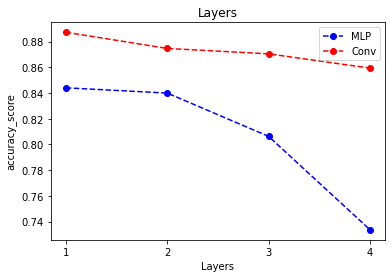

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x_mlp = np.array((1,2,3,4))
y_mlp = np.array((0.8440, 0.8399, 0.8062, 0.7335))

x_conv = np.array((1,2,3,4))
y_conv = np.array((0.8872, 0.8746, 0.8704, 0.8593))

plt.plot(x_mlp, y_mlp, 'bo--', label="MLP")
plt.plot(x_conv, y_conv, 'ro--', label="Conv")
plt.xticks([1,2,3,4])
plt.legend()
plt.xlabel("Layers")
plt.ylabel("accuracy_score")
plt.title("Layers")